# German Credit Score Analysis

### Synopsis for the dataset:
The dataset has 1000 records and was downloaded as a CSV file. It contains numeric and categorical variables that represent various demographic and socio-economic characteristics of loan applicants. The target variable is whether an applicant was classified as having good or bad credit_risk. This data is collected from open source.

The following attributes are given (as given in the accompanying PDF file):  

**account_status:** status of existing checking account  
– A11: . . . < 0 €  
– A12: 0 <= . . . < 200 €  
– A13: . . . >= 200 € / salary assignments for at least 1 year  
– A14: no checking account  
<br>**duration:** duration in months  
<br>**credit_history:** credit history  
– A30: no credits taken / all credits paid back duly  
– A31: all credits at this bank paid back duly  
– A32: existing credits paid back duly till now  
– A33: delay in paying off in the past  
– A34: critical account / other credits existing (not at this bank)  
<br>**purpose:** purpose  
– A40: car (new)  
– A41: car (used)  
– A42: furniture/equipment  
– A43: radio/television  
– A44: domestic appliances  
– A45: repairs  
– A46: education  
– A48: retraining  
– A49: business  
– A410: others  
<br>**credit_amount:** credit amount  
<br>**savings:** savings account  
– A61: . . . < 100 €  
– A62: 100 <= . . . < 500 €  
– A63: 500 <= . . . < 1000 €  
– A64: .. >= 1000 €  
– A65: unknown / no savings account  
<br>**employment:** present employment duration  
– A71: unemployed  
– A72: . . . < 1 year  
– A73: 1 <= . . . < 4 years  
– A74: 4 <= . . . < 7 years  
– A75: .. >= 7 years  
<br>**installment_rate:** Installment rate in percentage of disposable income  
<br>**gender_and_marital_status:** personal status and sex  
– A91: male & divorced/separated  
– A92: female & divorced/separated/married  
– A93: male & single  
– A94: male & married/widowed  
– A95: female & single  
<br>**guarantors:** Other debtors/guarantors  
– A101: none  
– A102: co-applicant  
– A103: guarantor  
<br>**residence_duration:** Present residence duration  
<br>**property:** Property  
– A121: real estate  
– A122: if not A121: building society savings agreement / life insurance  
– A123: if not A121/A122: car or other, not in attribute 6  
– A124: unknown / no property  
<br>**age:** age in years  
<br>**other_installments:** Other installment plans  
– A141: bank  
– A142: stores  
– A143: none  
<br>**housing_type:** housing type  
– A151: rent  
– A152: own  
– A153: for free  
<br>**number_of_credits:** Number of existing credits at this bank  
<br>**occupation:** occupation  
– A171: unemployed / unskilled - non-resident  
– A172: unskilled - resident  
– A173: skilled employee / official  
– A174: management/self-employed/highly qualified employee/officer  
<br>**number_of_dependants:** Number of people being liable to provide maintenance for  
<br>**phone:** phone  
– A191: none  
– A192: yes, registered under the customers name  
<br>**foreign_worker:** foreign worker  
– A201: yes  
– A202: no  
<br>**credit_risk:** classification of an applicant’s credit risk  
– 1: good credit risk  
– 2: bad credit risk

### 1. Import libraries

Here the necessary libraries for data manipulation, visualization and modelling are imported. The figure size and seed is also set, and it is ensured that all columns in the dataframe will be printed by pandas.

In [45]:
# data manipulation
import numpy as np
import pandas as pd

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

# data modelling 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import sklearn.svm as svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
#from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


pd.set_option('display.max_columns', None)
np.random.seed(42)
plt.rcParams['figure.figsize'] = [9, 7]
sns.set_style("dark")
sns.set_style("darkgrid")

### 2. Exploratory Data Analysis

### 2.1 First look at the data

Here, the dataset is loaded into a pandas dataframe and ten rows are sampled to get a first view of the data.

In [46]:
# load dataset into pandas dataframe

df_credit = pd.read_csv('/datasets/credit_data.csv')

df_credit.sample(10, random_state=42)

,account_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,gender_and_marital_status,guarantors,residence_duration,property,age,other_installments,housing_type,number_of_credits,occupation,number_of_dependants,phone,foreign_worker,credit_risk
521,A14,12,A34,A42,1592,A64,A74,3,A92,A101,2,A122,35.0,A143,A152,1,A173,1,A191,A202,1
737,A12,48,A32,A42,9960,A61,A72,1,A92,A101,2,A123,26.0,A143,A152,1,A173,1,A192,A201,2
740,A14,10,A32,A40,1287,A65,A75,4,A93,A102,2,A122,45.0,A143,A152,1,A172,1,A191,A202,1
660,A11,6,A34,A43,1957,A61,A74,1,A92,A101,4,A123,31.0,A143,A152,1,A173,1,A191,A201,1
411,A12,45,A34,A41,4576,A62,A71,3,A93,A101,4,A123,27.0,A143,A152,1,A173,1,A191,A201,1
678,A12,27,A34,A43,2520,A63,A73,4,A93,A101,2,A122,23.0,A143,A152,2,A172,1,A191,A201,2
626,A13,24,A32,A43,5152,A61,A74,4,A93,A101,2,A123,25.0,A141,A152,1,A173,1,A191,A201,1
513,A14,22,A32,A43,2675,A63,A75,3,A93,A101,4,A123,40.0,A143,A152,1,A173,1,A191,A201,1
859,A12,21,A34,A49,3652,A61,A74,2,A93,A101,3,A122,27.0,A143,A152,2,A173,1,A191,A201,1
136,A13,15,A32,A46,392,A61,A72,4,A92,A101,4,A122,23.0,A143,A151,1,A173,1,A192,A201,1


In [47]:
# printing some general information about the dataframe

df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   account_status             1000 non-null   object 
 1   duration                   1000 non-null   int64  
 2   credit_history             1000 non-null   object 
 3   purpose                    1000 non-null   object 
 4   credit_amount              1000 non-null   int64  
 5   savings                    1000 non-null   object 
 6   employment                 1000 non-null   object 
 7   installment_rate           1000 non-null   int64  
 8   gender_and_marital_status  1000 non-null   object 
 9   guarantors                 1000 non-null   object 
 10  residence_duration         1000 non-null   int64  
 11  property                   1000 non-null   object 
 12  age                        998 non-null    float64
 13  other_installments         1000 non-null   object

Here we can see the dataframe dimensions and datatypes. There are 1000 rows and 21 columns, with datatypes float64, int64 and object. 
<br>We also have two missing values in the columns "age" and "occupation".

In [48]:
# print rows with null values

df_credit[df_credit.isna().any(axis=1)]

,account_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,gender_and_marital_status,guarantors,residence_duration,property,age,other_installments,housing_type,number_of_credits,occupation,number_of_dependants,phone,foreign_worker,credit_risk
0,A11,6,A34,A40,860,A61,A75,1,A92,A101,4,A124,NaN,A143,A152,2,A173,1,A192,A201,1
9,A11,18,A32,A43,1345,A61,A73,4,A94,A101,3,A121,26.0,A141,A152,1,NaN,1,A191,A201,2
19,A12,9,A31,A40,1437,A62,A74,2,A93,A101,3,A124,29.0,A143,A152,1,NaN,1,A191,A201,2
886,A14,24,A34,A45,5507,A61,A75,3,A93,A101,4,A124,NaN,A143,A153,2,A173,1,A191,A201,1


All of the null values are from foreign workers (A201). Was this random? <br> <br>
Let's see how many foreign workers there are in the dataframe:

In [49]:
df_credit.foreign_worker.value_counts()

A201    963
A202     37
Name: foreign_worker, dtype: int64

Surprisingly, this dataset contains a large percentage of foreign workers (96.3%). Since only four rows are missing, it is better to drop them rather than spend the time imputing these values.

In [50]:
# drop rows with null values

df_credit.drop(df_credit[df_credit.isna().any(axis=1)].index, inplace=True)

Next, I take a look at the unique values in all the columns and cross-check them with the provided PDF file.

In [51]:
# print unique values in all columns

df_credit.apply(lambda col: ', '.join(map(str, col.unique())))

account_status                                              A11, A14, A12, A13
duration                     6, 12, 36, 21, 24, 48, 18, 10, 15, 9, 20, 54, ...
credit_history                                         A32, A34, A31, A30, A33
purpose                      A42, A40, A41, A43, A46, A44, A49, A45, A48, A410
credit_amount                428, 1402, 14318, 1647, 4169, 4605, 1274, 3123...
savings                                                A61, A63, A65, A62, A64
employment                                             A75, A74, A73, A72, A71
installment_rate                                                    2, 3, 4, 1
gender_and_marital_status                                   A92, A93, A94, A91
guarantors                                                    A101, A103, A102
residence_duration                                                  1, 4, 2, 3
property                                                A122, A123, A124, A121
age                          49.0, 37.0, 57.0, 40.0,

All rows except credit_risk have values as given in the PDF. The attribute credit_risk has an additional "-1" in some of the rows. Let's see how many rows have this value:

In [52]:
# rows with -1 credit risk

df_credit[df_credit['credit_risk']==-1]

,account_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,gender_and_marital_status,guarantors,residence_duration,property,age,other_installments,housing_type,number_of_credits,occupation,number_of_dependants,phone,foreign_worker,credit_risk
4,A11,21,A31,A40,1647,A65,A73,4,A93,A101,2,A122,40.0,A143,A152,2,A172,2,A191,A201,-1
99,A11,18,A32,A40,1216,A61,A72,4,A92,A101,3,A123,23.0,A143,A151,1,A173,1,A192,A201,-1
989,A14,6,A34,A43,700,A65,A75,4,A93,A101,4,A124,36.0,A143,A153,2,A173,1,A191,A201,-1


Since I don't know what this category signifies *and* it's a target variable, I decided it's best to drop these rows.

In [53]:
# drop rows with -1 credit risk

df_credit.drop(df_credit[df_credit['credit_risk'] == -1].index, inplace = True)

I then check for duplicate rows in the dataset:

In [54]:
# are there duplicate rows

df_credit[df_credit.duplicated()]

,account_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,gender_and_marital_status,guarantors,residence_duration,property,age,other_installments,housing_type,number_of_credits,occupation,number_of_dependants,phone,foreign_worker,credit_risk


### 2.2 Understanding the numerical variables

Next, let's take a closer look at the numerical attributes of interest in the dataset, starting with describe():

In [55]:
# statistical properties of numerical attributes duration, credit_amount and age

df_credit.describe()[['duration', 'credit_amount', 'age']]

,duration,credit_amount,age
count,993.000000,993.000000,993.000000
mean,20.947633,3281.516616,35.557905
std,12.075672,2827.074206,11.398081
min,4.000000,250.000000,19.000000
25%,12.000000,1372.000000,27.000000
50%,18.000000,2325.000000,33.000000
75%,24.000000,3973.000000,42.000000
max,72.000000,18424.000000,75.000000


Although this gives a good statistical overview, it's easier to understand the spread of these variables using boxplots:

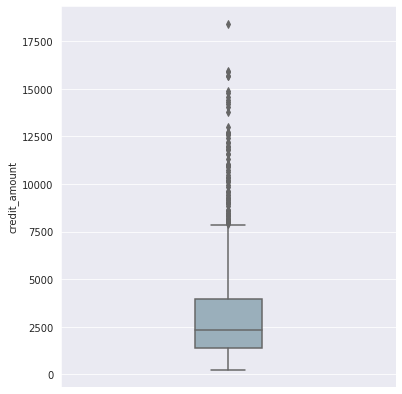

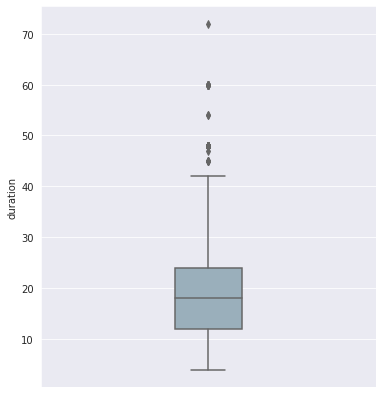

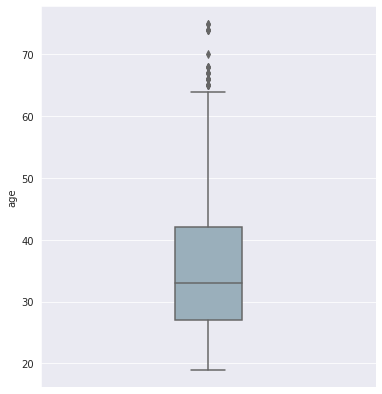

In [56]:
for p in ['credit_amount', 'duration', 'age']:
    plt.figure(figsize=(6,7))
    sns.boxplot(y=df_credit[p], width=0.2, color='#94B0C0', linewidth=1.5)

- credit_amount : 75% of applicants have less than 4000€ in credit. But we do have some applicants with very large credit amounts. It would be interesting to see later how this affects the credit risk.
- duration : 50% of applicants have loan duration between 12 and 24 months, but we also have a few applicants with 60+ months
- age : applicants have a median age of 33 years. The long upper whisker indicates a large variance among the greater age values.  
The long upper whisker in all three plots also indicate the skewness of the distribution

The skewness of the plots can be better visualized using histograms, as shown below:

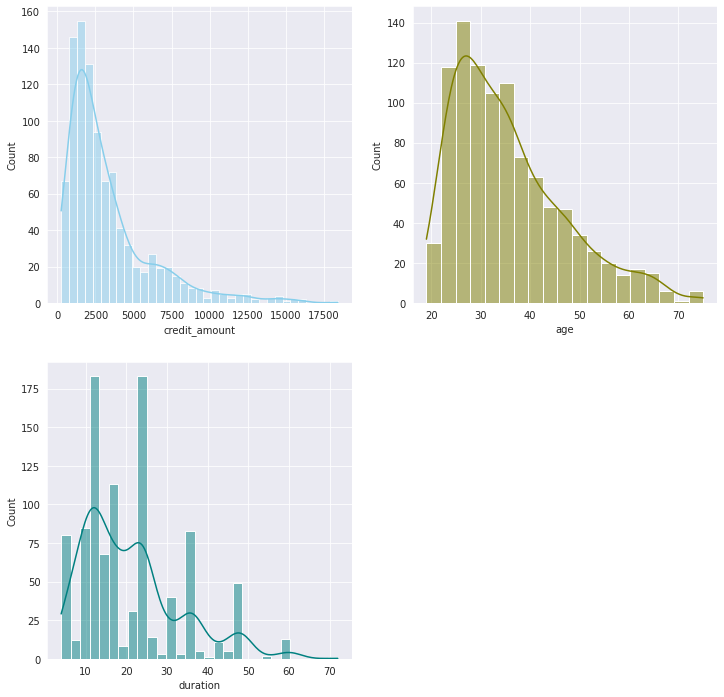

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=df_credit, x="credit_amount", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_credit, x="age", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_credit, x="duration", kde=True, color="teal", ax=axs[1, 0])
fig.delaxes(axs[1,1])

All three features (especially credit_amount) have tail-heavy histograms. This should be converted to log-scale later to make the distribution more normal. Otherwise, it's harder for the Machine Learning algorithm to detect patterns.

#### 2.2.1 Correlation heatmap

Next, I look for the correlation between the features by plotting a correlation heatmap.

<AxesSubplot:>

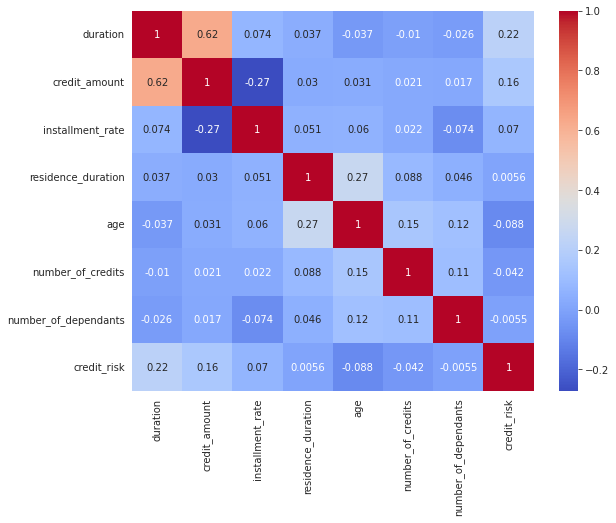

In [59]:
sns.heatmap(df_credit.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Most variables are not correlated, which is great for our ML algorithm because it introduces less bias and makes the learning algorithm faster.  
<br>We see that credit amount and duration have a positive correlation, i.e., higher credit amounts need a longer time to be paid back. Let's plot the two and take a look at how they affect credit risk:

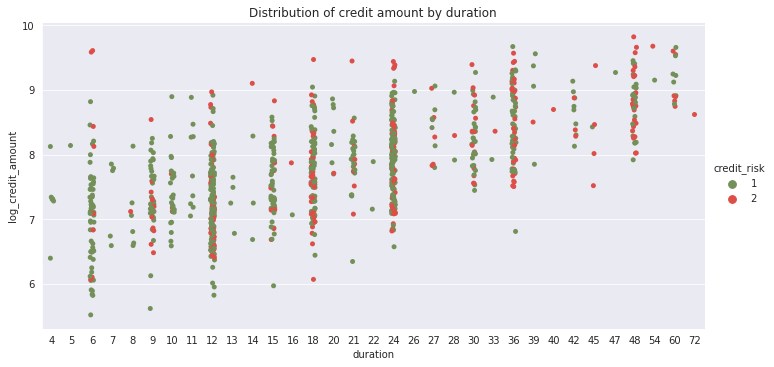

In [60]:
df_credit['log_credit_amount'] = np.log(df_credit['credit_amount'])
df_credit.drop('credit_amount', axis=1, inplace=True)

sns.catplot(data=df_credit, 
            x="duration", y="log_credit_amount", 
            hue="credit_risk", 
            palette=["#749059","#DD4E48"], 
            height=5, aspect=2).set(title='Distribution of credit amount by duration')

The credit amount is converted to log scale before plotting. We clearly see a linear relationship between the credit amount and duration. It's interesting to note that we see more green dots (aka "good" credit risk) on the left hand side of the plot. So even when applicants have large credit amounts, if the duration is lower, they still have good credit risk. And on the right hand side of the plot, we see more red dots (aka "bad" credit risk) - this makes sense as larger credit amounts with long duration to pay them back makes you more susceptible to being classified as having bad credit risk.

### 2.3 Understanding the categorical variables

Next, we'll take a closer look at some of the categorical variables in the dataset. Beginning with the distribution of the target variable itself:

<AxesSubplot:title={'center':'Distribution of target variable'}, xlabel='Credit Risk', ylabel='Count'>

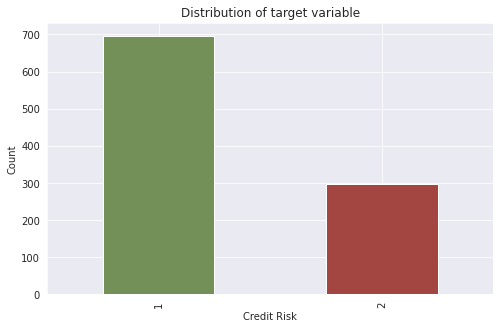

In [63]:
# target variable distribution

df_credit['credit_risk'].value_counts().plot(kind='bar',
                                             figsize=(8,5),
                                             title="Distribution of target variable",
                                             xlabel="Credit Risk",
                                             ylabel="Count",
                                             color=["#749059","#A34541"])

Here, green denotes a good credit risk, while red denotes a bad credit risk. We see that most applicants in this dataset have a good credit risk.

Next, let's take a look at the distribution of credit_risk across different variables.
<br>
Starting with housing status:

<AxesSubplot:xlabel='housing_type', ylabel='count'>

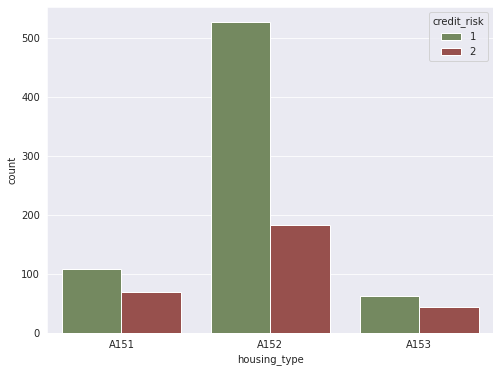

In [64]:
# housing status and credit risk

plt.figure(figsize=(8,6))
sns.countplot(x="housing_type", 
              hue="credit_risk", 
              data=df_credit, 
              palette=["#749059","#A34541"], 
              order=['A151','A152', 'A153'])

Quick note:  
A151 : rent <br>
A152 : own <br>
A153 : for free

This is where I realized that it makes more sense to look at relative values rather than absolute ones so I plotted the percentage of each housing type that has a good credit risk: 

Text(0, 0.5, 'Percentage')

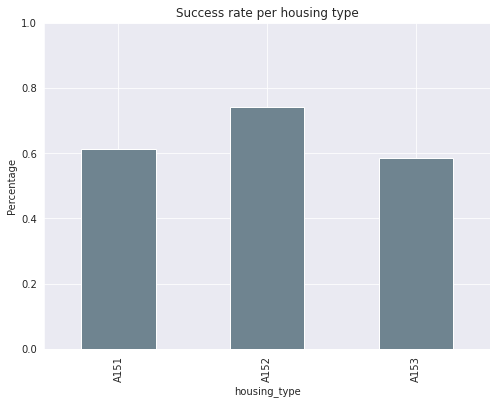

In [65]:
credit_by_housing_df = df_credit.groupby(['credit_risk', 'housing_type']).size().unstack()

plt.figure(figsize=(8,6))

(credit_by_housing_df / credit_by_housing_df.sum()).iloc[0].plot.bar(ylim=[0, 1], grid=True, color='#6F8490')
plt.title('Success rate per housing type')
plt.ylabel('Percentage')

We see here that applicants who own houses (A152) are ~15% more likely to have good credit risk. This makes sense since asset ownership is highly related to credit worthiness.  
To make this easier, I wrote a function that takes the feature name as input and plots the percentage of each category with good credit risk:

In [66]:
def credit_dist(col_name):
    df_new = df_credit.groupby(['credit_risk', col_name]).size().unstack()
    fig = plt.figure(figsize=(8,6))
    (df_new / df_new.sum()).iloc[0].plot.bar(ylim=[0,1], grid=True, color='#6F8490')
    plt.title('Success rate per {}'.format(col_name))
    plt.ylabel('Percentage')

Moving on to **occupation and credit risk**:  
<br>A171: unemployed / unskilled - non-resident
<br>A172: unskilled - resident
<br>A173: skilled employee / official
<br>A174: management/self-employed/highly qualified employee/officer

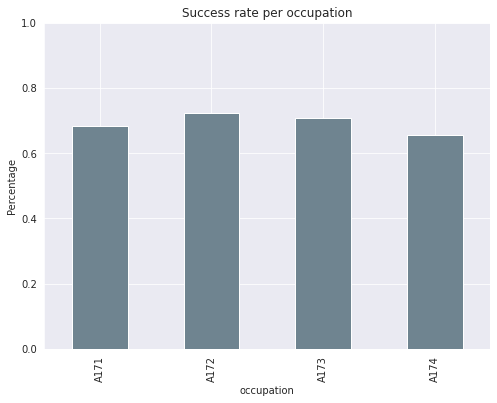

In [67]:
credit_dist('occupation')

Surprisingly, there doesn't seem to be a big difference amongst applicants with different types of occupation. I would've guessed that applicants who are skilled and at management level would be more likely to have good credit risk than applicants who are unemployed or unskilled. Huh.

Next, looking at **checking account and credit risk:**
<br>A11: . . . < 0 €
<br>A12: 0 <= . . . < 200 €
<br>A13: . . . >= 200 € / salary assignments for at least 1 year
<br>A14: no checking account

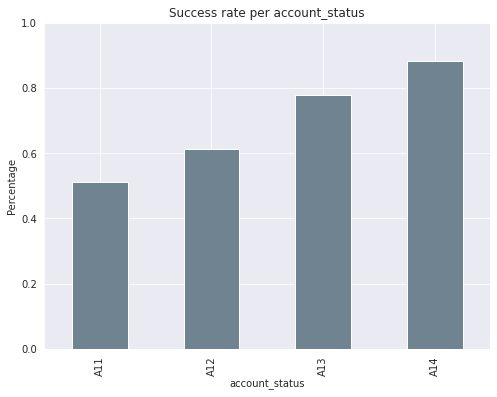

In [68]:
credit_dist('account_status')

Here, we see that the more money there is in the applicant's checking account, the more likely they are to have good credit risk - again, nothing surprising here! But it is strange that the highest percentage of applicants have no checking accounts, but still have good credit risk.

Moving on to **savings account and credit risk:**
<br>A61: . . . < 100 €
<br>A62: 100 <= . . . < 500 €
<br>A63: 500 <= . . . < 1000 €
<br>A64: .. >= 1000 €
<br>A65: unknown / no savings account

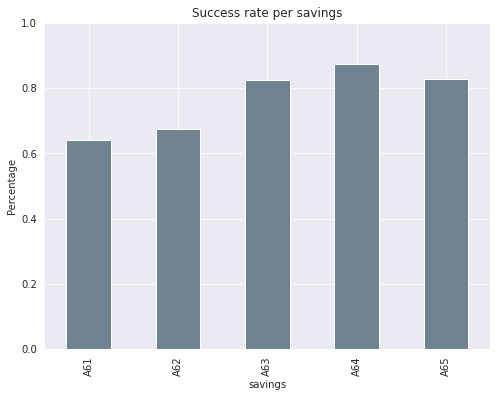

In [69]:
credit_dist('savings')

Again, applicants with more money saved up have a higher chance of having good credit risk.

## 3. Feature Engineering

Next, dummy variables are created for each possible value of each feature variable using one-hot encoding. Afterwards, the original columns are dropped.

In [71]:
# One-Hot Encoding

dummies_columns = ['occupation', 'purpose', 'housing_type', 'savings', 'account_status', 
                   'credit_history', 'employment', 'installment_rate', 'gender_and_marital_status', 
                   'guarantors', 'property', 'phone', 'foreign_worker', 'other_installments']

for col in dummies_columns:
    df_credit = df_credit.merge(pd.get_dummies(df_credit[col], 
                                               drop_first=True, 
                                               prefix=str(col)), 
                                left_index=True, right_index=True)

In [72]:
# drop the dummy columns

df_credit.drop(dummies_columns, axis=1, inplace=True)

## 4. Models

In this section, I will try out a few different models and evaluate them based on the recall and ROC curve. As a starting point, I will use a Linear Support Vector Classifier (SVC) as suggested by : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

First, we split the dataset into train and test sets (70-30).

In [73]:
# split into train and test data sets

X = df_credit.drop('credit_risk', axis=1).values  # drop target attribute
y = df_credit['credit_risk'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### 4.1 Support Vector Machine

Before we create the SVM classifier, we need to standardize the features using StandardScaler() by removing the mean and scaling to unit variance.

In [74]:
# standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create an svm classifier
svc = svm.SVC(kernel='linear')

# train the model using the training set
svc.fit(X_train, y_train)

# predict the response for test dataset
y_pred_svc = svc.predict(X_test)

In [75]:
print("Accuracy: ", accuracy_score(y_pred_svc, y_test))
print(classification_report(y_test, y_pred_svc))

Accuracy:  0.7449664429530202
              precision    recall  f1-score   support

           1       0.77      0.90      0.83       209
           2       0.62      0.38      0.47        89

    accuracy                           0.74       298
   macro avg       0.70      0.64      0.65       298
weighted avg       0.73      0.74      0.72       298



The recall for the category "2" or "bad credit risk" is quite low - since it's more important to be able to correctly predict which applicants have bad risk, I will try hyperparameter tuning to see if I can improve this value.

In [76]:
# defining parameter range
param_grid = {"gamma": [0.1,0.5,1,5,10,50,100],
                  "C": [0.1,0.5,1,5,10,50,100]} 

grid = GridSearchCV(svc, param_grid, refit = True, scoring='recall', verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.878 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.888 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.918 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.907 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.5;, score=0.857 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.5;, score=0.878 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.5;, score=0.888 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.5;, score=0.918 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.5;, score=0.907 total time=   0.0s
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.857 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100],
                         'gamma': [0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='recall', verbose=3)

In [77]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 0.1}
SVC(C=0.1, gamma=0.1, kernel='linear')


In [78]:
# predict the response for test dataset
y_pred_grid = grid.predict(X_test)

print("Accuracy: ", accuracy_score(y_pred_grid, y_test))
print(classification_report(y_test, y_pred_grid))

Accuracy:  0.7449664429530202
              precision    recall  f1-score   support

           1       0.77      0.91      0.83       209
           2       0.63      0.36      0.46        89

    accuracy                           0.74       298
   macro avg       0.70      0.63      0.65       298
weighted avg       0.73      0.74      0.72       298



Unfortunately, our recall is still pretty low at 0.36 - meaning, only 36% of bad credit risk applicants were correctly identified by the model.  
Since we plan on trying out other models and plotting the roc curve in the end, let's save the results in a table.

In [79]:
# define a result table as a pandas dataframe
result_table = pd.DataFrame(columns=['model', 'fpr','tpr','auc'])

fpr, tpr, _ = roc_curve(y_test, y_pred_grid, pos_label=2)
auc = roc_auc_score(y_test, y_pred_grid)

result_table = result_table.append({'model': "LinearSVC",
                                         'fpr' : fpr,
                                         'tpr' : tpr,
                                         'auc' : auc}, ignore_index=True)

/tmp/ipykernel_4638/444224913.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'model': "LinearSVC",


### 4.2 Logistic Regression

In [80]:
# create an LR classifier
log = LogisticRegression()

# train the model using the training set
log.fit(X_train, y_train)

# predict the response for test dataset
y_pred_log = log.predict(X_test)

print("Accuracy: ", accuracy_score(y_pred_log, y_test))
print(classification_report(y_test, y_pred_log))

Accuracy:  0.7348993288590604
              precision    recall  f1-score   support

           1       0.77      0.88      0.82       209
           2       0.58      0.39      0.47        89

    accuracy                           0.73       298
   macro avg       0.68      0.64      0.65       298
weighted avg       0.72      0.73      0.72       298



In [81]:
# calculating fpr, tpr and auc for plotting roc curve
fpr, tpr, _ = roc_curve(y_test, y_pred_log, pos_label=2)
auc = roc_auc_score(y_test, y_pred_log)


# store the results in result_table
result_table = result_table.append({'model': "LR",
                                         'fpr' : fpr,
                                         'tpr' : tpr,
                                         'auc' : auc}, ignore_index=True)

/tmp/ipykernel_4638/4241003069.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'model': "LR",


Recall isn't very good here, but still better than with SVC. Moving on...

### 4.3 Naive-Bayes

In [82]:
# create an NB classifier
nb = GaussianNB()

# train the model using the training set
nb.fit(X_train, y_train)

# predict the response for test dataset
y_pred_nb = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_pred_nb, y_test))
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.7181208053691275
              precision    recall  f1-score   support

           1       0.81      0.78      0.79       209
           2       0.53      0.58      0.55        89

    accuracy                           0.72       298
   macro avg       0.67      0.68      0.67       298
weighted avg       0.73      0.72      0.72       298



In [83]:
# calculating fpr, tpr and auc for plotting roc curve
fpr, tpr, _ = roc_curve(y_test, y_pred_nb, pos_label=2)
auc = roc_auc_score(y_test, y_pred_nb)

# store the results in result_table
result_table = result_table.append({'model': "Naive-Bayes",
                                         'fpr' : fpr,
                                         'tpr' : tpr,
                                         'auc' : auc}, ignore_index=True)

/tmp/ipykernel_4638/2091260333.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'model': "Naive-Bayes",


I will discuss this result in the last section.

### 4.4 Random Forest Classifier

In [84]:
# create an RF classifier
rf = RandomForestClassifier()

# train the model using the training set
rf.fit(X_train, y_train)

# predict the response for test dataset
y_pred_rf = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_pred_rf, y_test))
print(classification_report(y_test, y_pred_rf))

Accuracy:  0.7583892617449665
              precision    recall  f1-score   support

           1       0.76      0.95      0.85       209
           2       0.72      0.31      0.44        89

    accuracy                           0.76       298
   macro avg       0.74      0.63      0.64       298
weighted avg       0.75      0.76      0.72       298



In [85]:
# printing default parameters of RF model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

I will now search for the best parameters, but this time using RandomizedSearchCV to save on computation time:

In [97]:
param_grid_rf = {"max_depth": range(3,10),
                  "max_features": ['log2', 'sqrt'],
                  "min_samples_leaf": [5, 10, 15, 20, 25],
                  "n_estimators": [5, 10, 25, 50, 150]}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(rf, param_grid_rf, cv=5, n_iter=10)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(3, 10),
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 15, 20, 25],
                                        'n_estimators': [5, 10, 25, 50, 150]})

In [98]:
# print best parameters after tuning
random_search.best_params_

{'n_estimators': 50,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 6}

In [99]:
# predict the response using the test set
y_pred_rf = random_search.predict(X_test)

print("Accuracy: ", accuracy_score(y_pred_rf, y_test))
print(classification_report(y_test, y_pred_rf))

Accuracy:  0.7281879194630873
              precision    recall  f1-score   support

           1       0.72      1.00      0.84       209
           2       0.90      0.10      0.18        89

    accuracy                           0.73       298
   macro avg       0.81      0.55      0.51       298
weighted avg       0.78      0.73      0.64       298



Here we have a high precision and a low recall - the bad credit risk class is not well detected but when it is, the model is very reliable. Interesting!

In [100]:
# calculating fpr, tpr and auc for plotting roc curve
fpr, tpr, _ = roc_curve(y_test, y_pred_rf, pos_label=2)
auc = roc_auc_score(y_test, y_pred_rf)


# store the results in result_table
result_table = result_table.append({'model': "Random Forest",
                                         'fpr' : fpr,
                                         'tpr' : tpr,
                                         'auc' : auc}, ignore_index=True)

/tmp/ipykernel_4638/2190918120.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'model': "Random Forest",


### 5. Evaluation

And now we plot the ROC curve and calculate the AOC for our models - this tells us how good our models are at correctly distinguishing between classes.

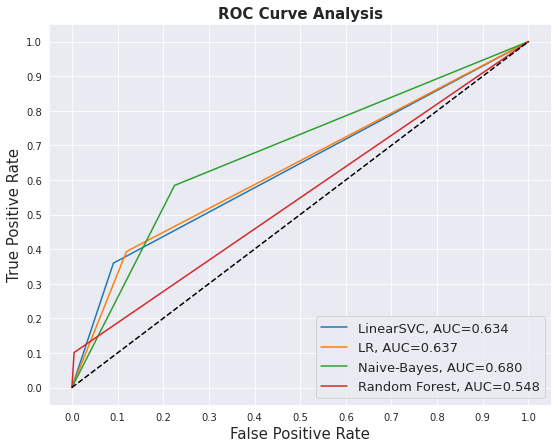

In [101]:
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(result_table.loc[i]['model'], result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')
plt.rcParams['figure.figsize'] = [8, 8]

Based on the AUC and the recall, our best performing model is Naive-Bayes. And our worst performer is Random Forest Classifier.